In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
cwd = os.getcwd()

In [75]:
df_AUS = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='AUS CY').fillna(0)
df_NSW = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='NSW CY').fillna(0)
df_VIC = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='VIC CY').fillna(0)
df_QLD = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='QLD CY').fillna(0)
df_SA = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='SA CY').fillna(0)
df_WA = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='WA CY').fillna(0)
df_TAS = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='TAS CY').fillna(0)
df_NT = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='NT CY').fillna(0)
df_Summary = pd.read_excel(cwd + "/ausenergystat2024.xlsx", sheet_name='State summary 2023').fillna(0)

In [76]:
df_NSW_total = pd.melt(df_NSW.loc[[4,11],:], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_NSW_total['State'] = 'NSW'
df_AUS_total = pd.melt(df_AUS.loc[[4,11],:], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_AUS_total['State'] = 'AUS'
df_VIC_total = pd.melt(df_VIC.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_VIC_total['State'] = 'VIC'
df_QLD_total = pd.melt(df_QLD.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_QLD_total['State'] = 'QLD'
df_SA_total = pd.melt(df_SA.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_SA_total['State'] = 'SA'
df_WA_total = pd.melt(df_WA.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_WA_total['State'] = 'WA'
df_TAS_total = pd.melt(df_TAS.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_TAS_total['State'] = 'TAS'
df_NT_total = pd.melt(df_NT.loc[[4, 11], :], id_vars='Sources', var_name='Year', value_name='Energy Generation')
df_NT_total['State'] = 'NT'

In [77]:
df_Summary_total = pd.concat([df_NSW_total, df_AUS_total, df_VIC_total, df_QLD_total, df_SA_total, df_WA_total, df_TAS_total, df_NT_total])
df_Summary_total

,Sources,Year,Energy Generation,State
0,Total non-renewable,2015,59748.384,NSW
1,Total renewable,2015,6466.497,NSW
2,Total non-renewable,2016,57961.691,NSW
3,Total renewable,2016,9164.311,NSW
4,Total non-renewable,2017,61673.365,NSW
...,...,...,...,...
13,Total renewable,2021,273.212,NT
14,Total non-renewable,2022,4855.429,NT
15,Total renewable,2022,299.373,NT
16,Total non-renewable,2023,4687.446,NT


In [78]:
state_available = df_Summary_total['State'].unique()
state_available

array(['NSW', 'AUS', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT'], dtype=object)

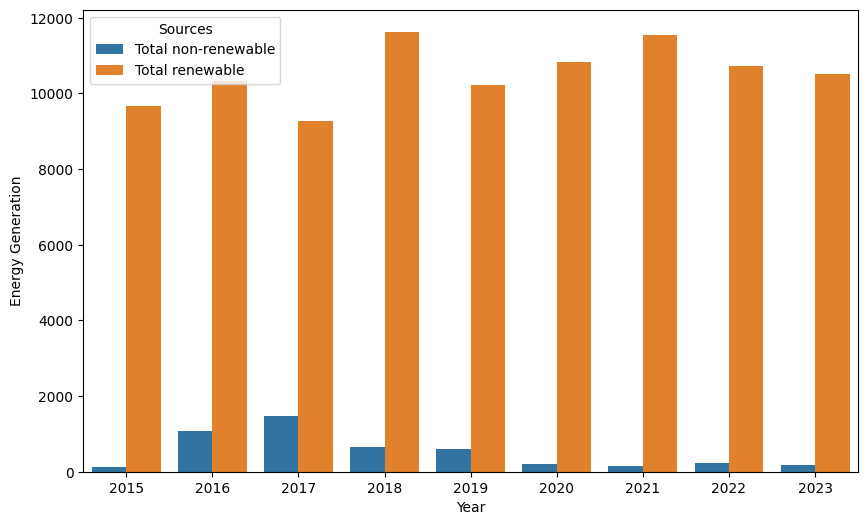

In [79]:
state_selected = state_available[6]
df_state = df_Summary_total[df_Summary_total['State'] == state_selected]

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Energy Generation', data=df_state, hue='Sources')
plt.show()

In [80]:
# Calculate total energy generation per state per year
total_generation_per_state_year = df_Summary_total.groupby(['State', 'Year'])['Energy Generation'].sum().reset_index()
total_generation_per_state_year.rename(columns={'Energy Generation': 'Total Generation'}, inplace=True)

# Merge the total back to the original data
df_Summary_total_merged = pd.merge(df_Summary_total, total_generation_per_state_year, on=['State', 'Year'])

# Calculate the percentage column
df_Summary_total_merged['Percentage'] = (df_Summary_total_merged['Energy Generation'] / df_Summary_total_merged['Total Generation']) * 100

df_Summary_total_merged = df_Summary_total_merged.round(2)
df_Summary_total_merged

,Sources,Year,Energy Generation,State,Total Generation,Percentage
0,Total non-renewable,2015,59748.38,NSW,66214.88,90.23
1,Total renewable,2015,6466.50,NSW,66214.88,9.77
2,Total non-renewable,2016,57961.69,NSW,67126.00,86.35
3,Total renewable,2016,9164.31,NSW,67126.00,13.65
4,Total non-renewable,2017,61673.36,NSW,69533.78,88.70
...,...,...,...,...,...,...
139,Total renewable,2021,273.21,NT,4918.68,5.55
140,Total non-renewable,2022,4855.43,NT,5154.80,94.19
141,Total renewable,2022,299.37,NT,5154.80,5.81
142,Total non-renewable,2023,4687.45,NT,5022.18,93.33


In [81]:
df_Summary_total_merged.to_csv(cwd + "/byStateSource.csv", index=False)